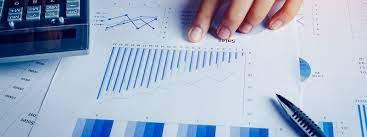

# **Projeto**

**Título:** Análise da probabilidade de distúrbio mental no trabalho com uso do classificador de Naive Bayes

**Objetivo:**

Este projeto tem como objetivo utilizar o classificador de Naive Bayes para prever a existência de colaboradores com potencial para adquirir doenças mentais, como também, realizar uma análise exploratória para identificar as principais características dos entrevistados por faixa etária, principalmente, o público Jovem, uma vez que estes estão no início de suas carreiras. Além disso, pretende-se entender como as empresas vem se comportando em relação a este tema. Pois, sabe-se que o quanto antes houver um pré-diagnóstico, ações mais assertivas podem ser tomadas para promover um ambiente de trabalho mais saudável.

# **Análise Exploratória dos Dados**

Utilizou uma base de dados da plataforma [Kaggle](https://www.kaggle.com/shreyaspj/mental-health), a qual faz um estudo em relação a saúde mental dos trabalhadores que atuam na área da tecnologia, o estudo foi realizado entre os anos de 2014 a 2016, para tanto realizou-se uma pesquisa do tipo survey para responder as questões que expressassem as opiniões dos trabalhadores em relação a sua percepção de saúde mental em relação ao trabalho e a atuação das empresas frente a esse assunto.

Portanto, nossa análise exploratória pretende responder as seguintes questões de pesquisa.
1. Qual a faixa etária dos entrevistados?
2. Quais as principais diferenças da saúde mental dos entrevistados por faixa etária?
3. Os Jovens apresentam problemas de saúde mental?
4. Os Jovens estão mais acessíveis para discutir problemas de saúde mental?
5. As empresas são transparentes nas ações de prevenção e cuidados em relação a saúde mental para seus colaboradores?

**Faixa Etária**



* Jovens - 18 a 24 anos
* Adultos - 25 a 59 anos
* Maior Idade - Acima de 59 anos

**Dicionário dos Dados:**

|Atributo                 |     Dicionário                                    |
|-------------------------|---------------------------------------------------|
|Age                      | Idade                                             |
|Gender                   | Gênero                                            |
|Country                  | País                                              |
|state                    | Estado                                            | 
|self_employed            | Você trabalha por conta própria?                  |
|family_history           | Você tem histórico familiar de doença mental?     |
|treatment                | Você procurou tratamento para um problema de saúde mental?                                                                       |
|work_interfere           | Se você tem um problema de saúde mental, acha que         isso interfere no seu trabalho?                                    |
|no_employees             | Quantos funcionários sua empresa ou organização possui?                                                                       |
|remote_work              | Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?                                                           |
|tech_company             | O seu empregador é principalmente uma empresa / organização de tecnologia?                                                    |
|benefits                 | O seu empregador oferece benefícios para a saúde mental?                                                                       |
|care_options             | Você conhece as opções de cuidados de saúde mental que seu empregador oferece?                                                   |
|wellness_program         | Seu empregador já discutiu saúde mental como parte de um programa de bem-estar de funcionários?                                  |
|seek_help                | Seu empregador fornece recursos para aprender mais sobre   questões de saúde mental e como procurar ajuda?                       | 
|anonymity                | O seu anonimato é protegido se você optar por tirar proveito dos recursos de tratamento de saúde mental ou abuso de substâncias?  |
|leave                    | É fácil para você tirar uma licença médica por um problema de saúde mental?                                                     |
|mental_health_consequence| Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?                             |
|phys_health_consequence  | Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?                             |
|coworkers                | Você estaria disposto a discutir um problema de   saúde mental com seus colegas de trabalho?                                    |
|supervisor               | Você estaria disposto a discutir um problema de saúde mental com seu (s) supervisor (es) direto (s)?                          |
|mental_health_interview  | Você mencionaria um problema de saúde mental com um potencial empregador em uma entrevista?                                       |
|phys_health_interview    | Você mencionaria um problema de saúde física com um potencial empregador em uma entrevista?                                       |
|mental_vs_physical       | Você acha que seu empregador leva a saúde mental  tão a sério quanto a saúde física?                                            |
|obs_consequence          | Você já ouviu falar ou observou consequências negativas para colegas de trabalho com problemas de saúde mental no seu local de trabalho?                                                                  |

**Obs:** Caso você tenha interesse em visualizar como foi realizado o tratamento e a limpeza dos dados realizados na fase anterior, [clique aqui](https://colab.research.google.com/drive/12f_FYQqE1OqwwHZ0Q3NutSIOjiG-Mmt_?usp=sharing).

**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
#apenas para facilitar a plotagem dos gráficos
%matplotlib inline 

In [3]:
plt.style.use('seaborn-bright')
#plt.style.available - visualizar os tipos de gráficos

In [4]:
#Padronizando o tamanho dos gráficos 
plt.rcParams['figure.figsize'] = (5,4)

Lendo o DataFrame

In [5]:
saude_mental = pd.read_csv("saude_mental_tratamento_limpeza_dos_dados.csv")

Primeiramente, iremos visualizar nosso Dataframe.

In [6]:
saude_mental.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year
0,37,Female,United States,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,2014
1,44,M,United States,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,2014
2,32,Male,Canada,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,2014
3,31,Male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,2014
4,31,Male,United States,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,2014


Removendo alguns atributos que não serão utilizados na nossa análise.

In [7]:
saude_mental.drop(columns=['Gender', 'Country', 'no_employees'], inplace=True)

# Tratamento de Outliers

Vamos visualizar de forma geral as informações estatísticas do nosso DataFrame, assim será possível observar se existe anomalias no nosso banco de dados.

In [8]:
saude_mental.describe()

,Age,Year
count,1.259000e+03,1259.00000
mean,7.942815e+07,2014.05560
std,2.818299e+09,0.23268
min,-1.726000e+03,2014.00000
25%,2.700000e+01,2014.00000
50%,3.100000e+01,2014.00000
75%,3.600000e+01,2014.00000
max,1.000000e+11,2016.00000


Observando a tabela acima é possível obervar que há anomalia no atributo idade, pois existe uma idade mínima com valor < que 0 e máximo um, fora da realidade de valores para idade.  

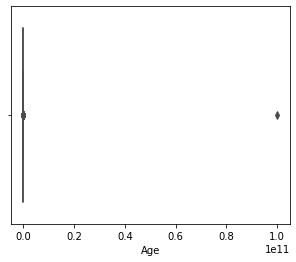

In [9]:
sns.boxplot(saude_mental.Age)
plt.show()

Outra forma de visualizar os outliers é plotando o atributo. Observa-se que visualmente não é apresentado nenhuma informação relevante para nossa análise. Dessa forma iremos realizar o tratamento de anomalia. 

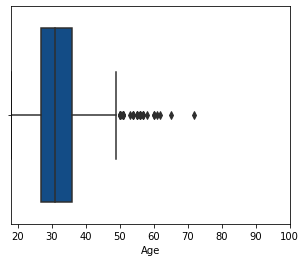

In [10]:
sns.boxplot(saude_mental.Age, color='#004C99')
plt.xlim(18,100)
plt.show()


Removendo os Outliers


In [11]:
saude_mental.drop(saude_mental[saude_mental['Age']< 18].index, inplace = True) 
saude_mental.drop(saude_mental[saude_mental['Age'] > 100].index, inplace = True)

# **Análise Univariada**

Observa-se no gráfico abaixo que a maioria dos entrevistados estão na faixa etária de 20 a 40 anos. 

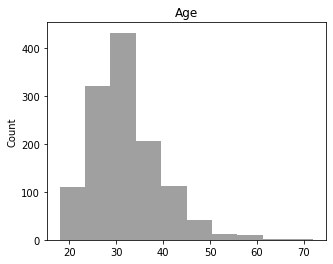

In [12]:
saude_mental["Age"].plot(kind = 'hist', color='#A0A0A0')
plt.title("Age")
plt.ylabel("Count")
plt.show()

Análise estatística  do atributo Idade.

In [13]:
saude_mental['Age'].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

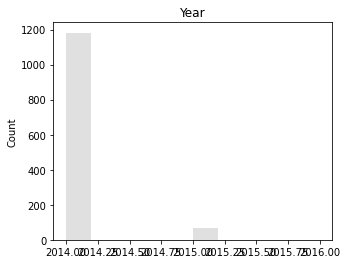

In [14]:
saude_mental["Year"].plot(kind = 'hist', color='#E0E0E0')
plt.title("Year")
plt.ylabel("Count")
plt.show()

**Exibindo as respostas de alguns atributos categóricos.**

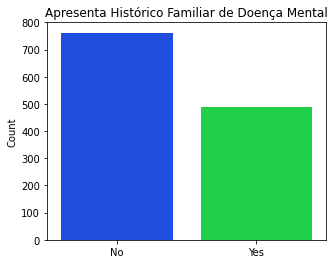

In [15]:
sns.countplot(saude_mental.family_history)
plt.title('Apresenta Histórico Familiar de Doença Mental')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

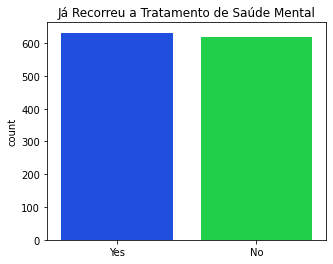

In [16]:
sns.countplot(saude_mental.treatment)
plt.title('Já Recorreu a Tratamento de Saúde Mental')
plt.xlabel('')
plt.show()

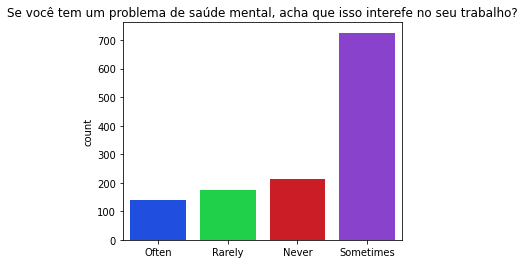

In [17]:
sns.countplot(saude_mental.work_interfere)
plt.title('Se você tem um problema de saúde mental, acha que isso interefe no seu trabalho?')
plt.xlabel('')
plt.show()

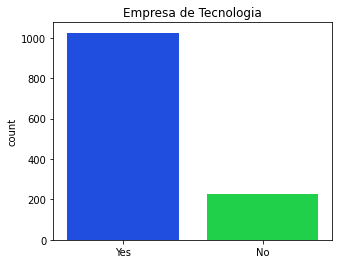

In [18]:
sns.countplot(saude_mental.tech_company)
plt.title('Empresa de Tecnologia')
plt.xlabel('')
plt.show()

Observa-se que o público entrevistado majoritariamente trabalha em empresa de tecnologia.

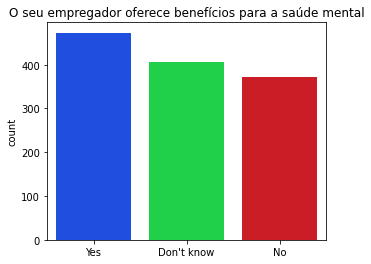

In [19]:
sns.countplot(saude_mental.benefits)
plt.title('O seu empregador oferece benefícios para a saúde mental')
plt.xlabel('')
plt.show()

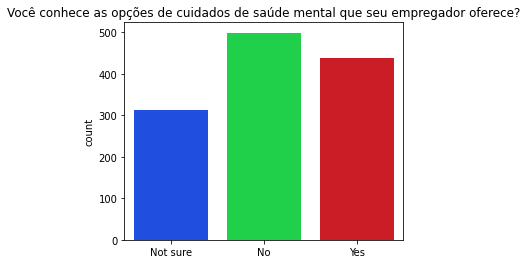

In [20]:
sns.countplot(saude_mental.care_options)
plt.title('Você conhece as opções de cuidados de saúde mental que seu empregador oferece?')
plt.xlabel('')
plt.show()

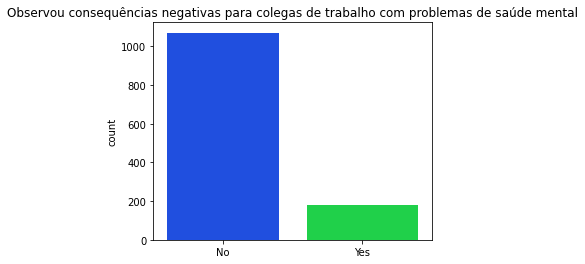

In [21]:
sns.countplot(saude_mental.obs_consequence)
plt.title("Observou consequências negativas para colegas de trabalho com problemas de saúde mental")
plt.xlabel('')
plt.show()

Ponto positivo da pesquisa que a maioria dos entrevistados apontaram não ter observado consequências negativas para colegas com problema de saúde mental no seu ambiente de trabalho.

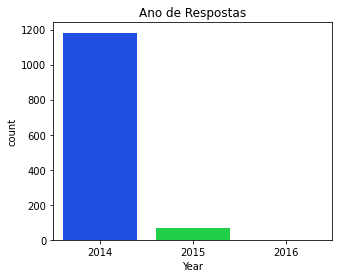

In [22]:
sns.countplot(saude_mental.Year)
plt.title("Ano de Respostas")
plt.show()

As respostas dos entrevistados estão concentradas no ano de 2014, com uma porcentagem 94%.

**Análise bivariada e multivariada dos dados**

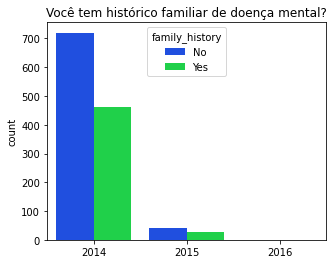

In [23]:
sns.countplot(saude_mental.Year, hue=saude_mental.family_history)
plt.title('Você tem histórico familiar de doença mental?')
plt.xlabel('')
plt.show()

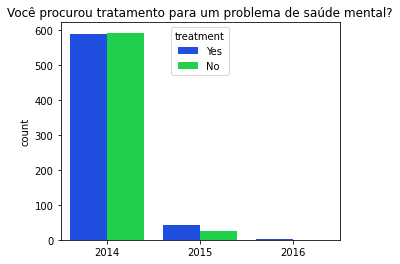

In [24]:
sns.countplot(saude_mental.Year, hue=saude_mental.treatment)
plt.title('Você procurou tratamento para um problema de saúde mental?')
plt.xlabel('')
plt.show()

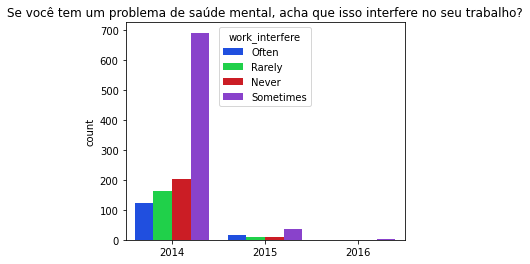

In [25]:
sns.countplot(saude_mental.Year, hue=saude_mental.work_interfere)
plt.title('Se você tem um problema de saúde mental, acha que isso interfere no seu trabalho?')
plt.xlabel('')
plt.show()

Comparando os três atributos(histórico familiar, treatmente e wor_interfere) por ano, observa-se que o histórico familiar não é um indicador de que o colaborador esteja mais vulnerável para procurar tratamento para problema de saúde mental.

**Respondendo as questões de pesquisa da análise dos dados.**

***1. Qual a faixa etária dos entrevistados?***

Classificando a idade dos entrevistado por faixa etária.

Adicionando um novo atributo no nosso DataFrame para guardar a faixa etária de cada entrevistado. 

In [26]:
saude_mental['faixa_etaria'] = "Jovem"
saude_mental.loc[((saude_mental['Age'] > 24) & (saude_mental['Age'] < 60)), 'faixa_etaria'] = "Adulto"
saude_mental.loc[(saude_mental['Age'] >= 60), 'faixa_etaria'] = "Melhor Idade"


In [27]:
# Total por faixa etária
saude_mental['faixa_etaria'].value_counts()

Adulto          1089
Jovem            156
Melhor Idade       6
Name: faixa_etaria, dtype: int64

Exibindo a porcentagem por faixa etária dos entrevistados.

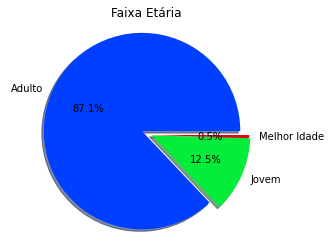

In [28]:
#define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.1, 0.01, 0)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(saude_mental['faixa_etaria'].value_counts(),labels=saude_mental['faixa_etaria'].unique(), autopct='%1.1f%%', shadow=True, explode=explode)

#inseri a legenda e a localização da legenda.
#plt.legend(saude_mental['faixa_etaria'].unique(), loc=1)

# define que o gráfico será plotado em circulo
plt.axis('equal')
plt.title('Faixa Etária')
plt.show()



Predominantemente o público entrevistado pertence as pessoas mais maduras, a participação dos jovens foi mais tímida, no entanto, nos permitirá responder algumas questões de pesquisa. 

***BoxPlot comparativo das idades por faixa etária***

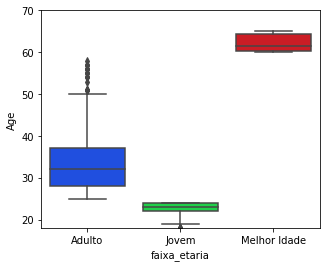

In [29]:
sns.boxplot(x=saude_mental.faixa_etaria, y=saude_mental.Age)
plt.ylim(18,70)
plt.show()

O gráfico acima nos permite inferir que a idade dos adultos possui maior variabilidade comparado as demias faixas etárias. 

**Análise estatística por faixa etária.**

In [30]:
saude_mental[saude_mental['faixa_etaria'] == 'Jovem'].describe()

,Age,Year
count,156.000000,156.000000
mean,22.384615,2014.076923
std,1.694247,0.267328
min,18.000000,2014.000000
25%,22.000000,2014.000000
50%,23.000000,2014.000000
75%,24.000000,2014.000000
max,24.000000,2015.000000


In [31]:
saude_mental[saude_mental['faixa_etaria'] == 'Adulto'].mean()

Age       33.292929
Year    2014.052342
dtype: float64

In [32]:
saude_mental[saude_mental['faixa_etaria'] == 'Melhor Idade'].describe()

,Age,Year
count,6.000000,6.000000
mean,63.333333,2014.166667
std,4.633213,0.408248
min,60.000000,2014.000000
25%,60.250000,2014.000000
50%,61.500000,2014.000000
75%,64.250000,2014.000000
max,72.000000,2015.000000


***2. Quais as principais diferenças da saúde mental dos entrevistados por faixa etária?***

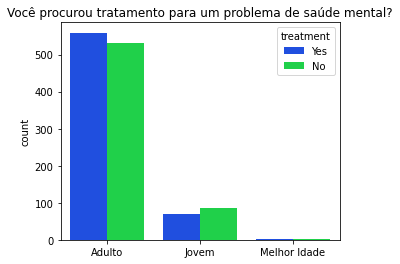

In [33]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.treatment)
plt.title('Você procurou tratamento para um problema de saúde mental?')
plt.xlabel('')
plt.show()

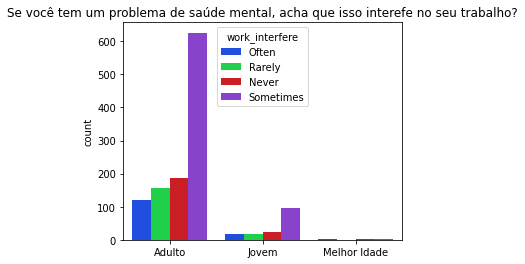

In [34]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.work_interfere)
plt.title('Se você tem um problema de saúde mental, acha que isso interefe no seu trabalho?')
plt.xlabel('')
plt.show()

In [35]:
#Agrupando o atributo faixa etaria
agrup_faixa_etaria=saude_mental.groupby(saude_mental['faixa_etaria'])

In [36]:
agrup_faixa_etaria['treatment', 'work_interfere'].describe()

treatment                  work_interfere                       
                 count unique  top freq          count unique        top freq
faixa_etaria                                                                 
Adulto            1089      2  Yes  559           1089      4  Sometimes  626
Jovem              156      2   No   86            156      4  Sometimes   97
Melhor Idade         6      2   No    3              6      3  Sometimes    3

As respostas para esta pergunta foram bem divididas, pois como pode-se visualizar no Gráfico acima a diferença do público Adulto que recorreu a algum tratamento de saúde mental é muito pequena para os que não recorreram. Já  o público Jovem a maioria respondeu não ter recorrido a algum problema de saúde mental, mas a diferença foi bem tímida. Quando perguntados se sua saúde mental já interferiu no seu trabalho, predominantemente, os dois públicos indicaram que sim, as vezes. E por fim, a metade dos entrevistados, classificados na faixa etária de melhor idade, responderam que já recorreram a tratamento para sua saúde mental, e que esse problema já interferiu no seu trabalho, indicando a necessidade de uma intervenção imediata para esse público.

**3. Os Jovens apresentam problemas de saúde mental?**

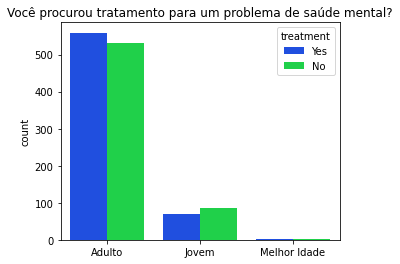

In [37]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.treatment)
plt.title('Você procurou tratamento para um problema de saúde mental?')
plt.xlabel('')
plt.show()

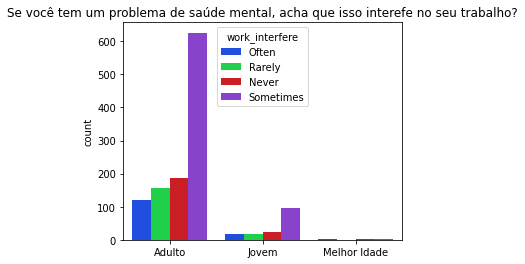

In [38]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.work_interfere)
plt.title('Se você tem um problema de saúde mental, acha que isso interefe no seu trabalho?')
plt.xlabel('')
plt.show()

In [39]:
agrup_faixa_etaria['treatment', 'work_interfere'].describe()

treatment                  work_interfere                       
                 count unique  top freq          count unique        top freq
faixa_etaria                                                                 
Adulto            1089      2  Yes  559           1089      4  Sometimes  626
Jovem              156      2   No   86            156      4  Sometimes   97
Melhor Idade         6      2   No    3              6      3  Sometimes    3

Observou-se que o público Jovem na sua maioria apontou não ter recorrido a algum problema de saúde mental, no entanto, a maioria indicou que seu problema de saúde mental, as vezes interfere no seu trabalho, apresentando indícios que esse público mesmo sofrendo de algum adoecimento mental, não solicita ajuda.

***4. Os Jovens estão mais acessíveis para discutir problemas de saúde mental no trabalho??***

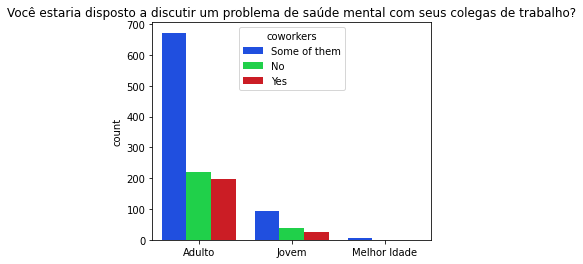

In [40]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.coworkers)
plt.title('Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?')
plt.xlabel('')
plt.show()

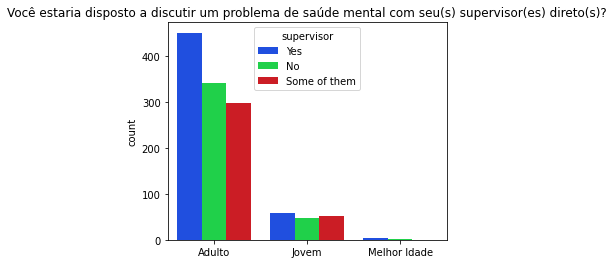

In [41]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.supervisor)
plt.title('Você estaria disposto a discutir um problema de saúde mental com seu(s) supervisor(es) direto(s)?')
plt.xlabel('')
plt.show()

In [42]:
agrup_faixa_etaria[ 'coworkers','supervisor'].describe()

coworkers                           supervisor                 
                 count unique           top freq      count unique  top freq
faixa_etaria                                                                
Adulto            1089      3  Some of them  672       1089      3  Yes  450
Jovem              156      3  Some of them   93        156      3  Yes   58
Melhor Idade         6      1  Some of them    6          6      2  Yes    4

Predominantemente, os Jovens indicaram possuir confiabilidade de conversar problemas de saúde mental somente com colegas de trabalho de sua confiança. Já para seus supervisores a maioria indicou que seria possível discutir esse tema. 

***5. As empresas são transparentes nas ações de prevenção e cuidados em relação a saúde mental para seus colaboradores?***

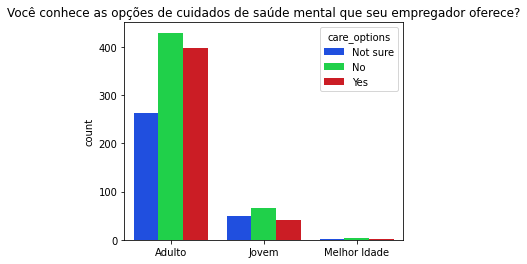

In [43]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.care_options)
plt.title('Você conhece as opções de cuidados de saúde mental que seu empregador oferece?')
plt.xlabel('')
plt.show()

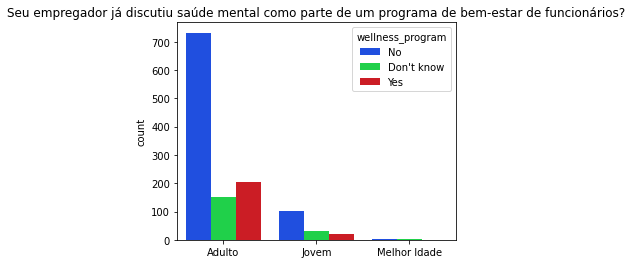

In [44]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.wellness_program)
plt.title('Seu empregador já discutiu saúde mental como parte de um programa de bem-estar de funcionários?')
plt.xlabel('')
plt.show()

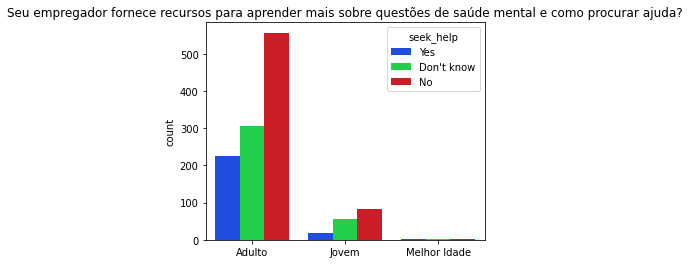

In [45]:
sns.countplot(saude_mental.faixa_etaria, hue=saude_mental.seek_help)
plt.title('Seu empregador fornece recursos para aprender mais sobre questões de saúde mental e como procurar ajuda?')
plt.xlabel('')
plt.show()

In [46]:
agrup_faixa_etaria['care_options', 'wellness_program','seek_help'].describe()

care_options                  ... seek_help                 
                    count unique top freq  ...     count unique  top freq
faixa_etaria                               ...                           
Adulto               1089      3  No  429  ...      1089      3   No  557
Jovem                 156      3  No   66  ...       156      3   No   82
Melhor Idade            6      3  No    4  ...         6      3  Yes    3

[3 rows x 12 columns]

Pode-se inferir que as empresas precisam realizar mais ações relacionadas a saúde mental dos trabalhadores, pois, dominantemente, os colaboradores indicaram desconhecer as opções de cuidados, programas de bem-estar e como procurar ajuda para problemas de distúrbio mental oferecidos pela empresa ou empregador. 

Finalizamos a análise exploratória dos dados, agora iremos salvar nosso Dataframe.

In [47]:
saude_mental.to_csv('saude_mental_analise_exploratoria.csv', index=False)